# Other feature scaling techniques

In last notebook we explained the feature scaling = NORMALIZATION of input and target data of model.<br>
There was explained max value normalization where we divided all data points with maximum of its group to get data in range: 0 <= x <= 1

In this will be explained:
## Mean normalization:
$x1\_scalled = {x1 - μ \over Xmax - Xmin}$

where:
  - μ = mean value of vector x
  - Xmax = max value of vector x
  - Xmin = min value of vector x
 

## Z-score normalization
$x1\_scaled = {x1 - μ \over σ} $

where:
  - μ = mean value of vector x
  - σ = standard deviation 

 

In [94]:
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [95]:
data = pd.read_csv('datasets/housing_prices.csv')
x_train, y_train = np.split(data, [2], axis=1)
x_train_area = x_train['area']
x_train_rooms = x_train['rooms']
y_train_price = y_train['price']

# Mean normalization

In [96]:
def mean_normalization(data_vector):
    """
    Calculates mean normalization of given data
    
    Arguments:
        data_vector (ndarray (m,)): Data vector, m - size of vector
    
    Returns
        normalized_data (ndarray (m,)): Normalized data vector
    """

    max_value = np.max(data_vector)
    min_value = np.min(data_vector)
    mean_value = np.mean(data_vector)
    
    normalized_data = (data_vector - mean_value)/(max_value - min_value)
    
    return normalized_data
    

In [97]:
x_train_area_mean_normalized = mean_normalization(x_train_area)
x_train_rooms_mean_normalized = mean_normalization(x_train_rooms)
y_train_price_mean_normalized = mean_normalization(y_train_price)
print(f'Original area data: \n{x_train_area[:5]}\n\nMean normalized area data: \n{x_train_area_mean_normalized[:5]}')

Original area data: 
0    210
1    160
2    240
3    141
4    300
Name: area, dtype: int64

Mean normalized area data: 
0    0.028447
1   -0.109674
2    0.111320
3   -0.162161
4    0.277066
Name: area, dtype: float64


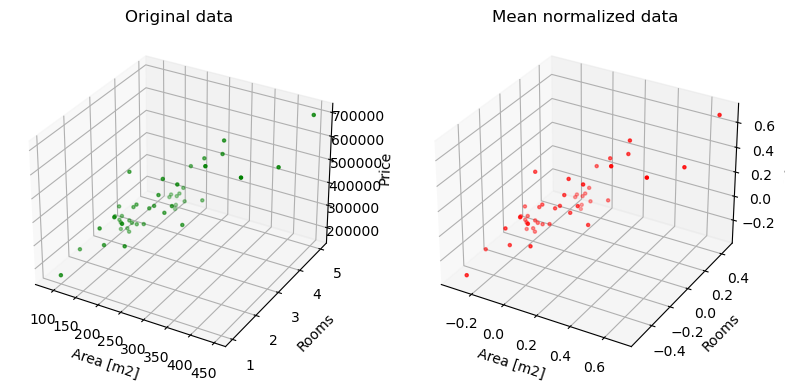

In [98]:
plt.interactive(False)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')

ax1.scatter(x_train_area, x_train_rooms, y_train_price, marker='.', color='green')
ax1.set_xlabel("Area [m2]")
ax1.set_ylabel("Rooms")
ax1.set_zlabel("Price")
plt.title('Original data')

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(x_train_area_mean_normalized, x_train_rooms_mean_normalized, y_train_price_mean_normalized, marker='.', color='red')
ax2.set_xlabel("Area [m2]")
ax2.set_ylabel("Rooms")
ax2.set_zlabel("Price")
plt.title('Mean normalized data')

plt.savefig('images/05_original_vs_mean_normalization.png')
plt.show()

# Z-score normalization 

In [99]:
def z_score_normalization(data_vector):
    """
    Calculates z-score normalization of given data
    
    Arguments:
        data_vector (ndarray (m,)): Data vector, m - size of vector
    
    Returns
        normalized_data (ndarray (m,)): Normalized data vector
    """

    mean_value = np.mean(data_vector)
    st_dev_value = np.std(data_vector)
    
    normalized_data = (data_vector - mean_value)/st_dev_value
    
    return normalized_data

In [100]:
x_train_area_z_score_normalized = z_score_normalization(x_train_area)
x_train_rooms_z_score_normalized = z_score_normalization(x_train_rooms)
y_train_price_z_score_normalized = z_score_normalization(y_train_price)
print(f'Original area data: \n{x_train_area[:5]}\n\nMean normalized area data: \n{x_train_area_z_score_normalized[:5]}')

Original area data: 
0    210
1    160
2    240
3    141
4    300
Name: area, dtype: int64

Mean normalized area data: 
0    0.131029
1   -0.505165
2    0.512745
3   -0.746919
4    1.276178
Name: area, dtype: float64


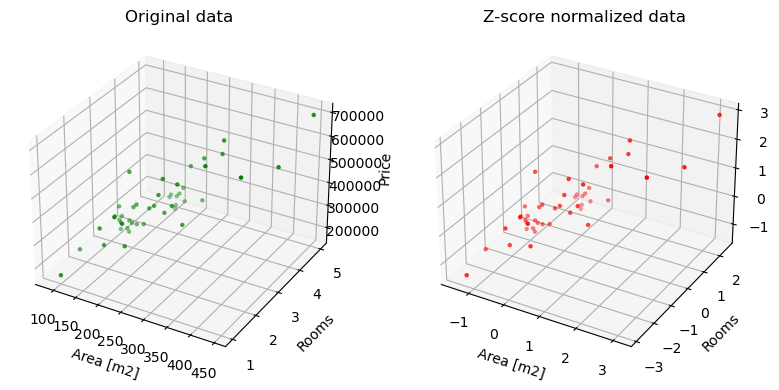

In [101]:
plt.interactive(False)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')

ax1.scatter(x_train_area, x_train_rooms, y_train_price, marker='.', color='green')
ax1.set_xlabel("Area [m2]")
ax1.set_ylabel("Rooms")
ax1.set_zlabel("Price")
plt.title('Original data')

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(x_train_area_z_score_normalized, x_train_rooms_z_score_normalized, y_train_price_z_score_normalized, marker='.', color='red')
ax2.set_xlabel("Area [m2]")
ax2.set_ylabel("Rooms")
ax2.set_zlabel("Price")

plt.title('Z-score normalized data')

plt.savefig('images/05_original_vs_z_score_normalization.png')
plt.show()

# Rescale process

### Mean normalization equation:
$x1\_scalled = {x1 - μ \over Xmax - Xmin}$

Rescale (deNormalization) equation:
$x1 = x1\_scalled * (Xmax - Xmin) + μ$

### Z-score normalization equation:
$x1\_scaled = {x1 - μ \over σ} $

Rescale (deNormalization) equation:
$x1 = x1\_scaled * σ + μ$